In [9]:
import os
import pandas as pd
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import keras
from keras import layers
from tensorflow.keras.preprocessing import image

In [6]:
dataset = "mnistlikedataset128x1.npz"

with np.load(dataset) as data:
    #load DataX as train_data
    data = data['DataX']
    np.random.shuffle(data)
    portion = int(0.8*len(data))
    x_train, x_test = data[:portion,:], data[portion:,:]
    x_train = x_train.astype('float32') / 255.
    x_test = x_test.astype('float32') / 255.
    x_train = np.reshape(x_train, (len(x_train), 128, 128, 1))
    x_test = np.reshape(x_test, (len(x_test), 128, 128, 1))
    print(x_train.shape)
    print(x_test.shape)

autoencoder_path = 'conv_autoencoder.keras'
autoencoder = keras.models.load_model(autoencoder_path)
decoded_imgs = autoencoder.predict(x_test)

(920, 128, 128, 1)
(230, 128, 128, 1)
8/8 [==============================] - 1s 144ms/step


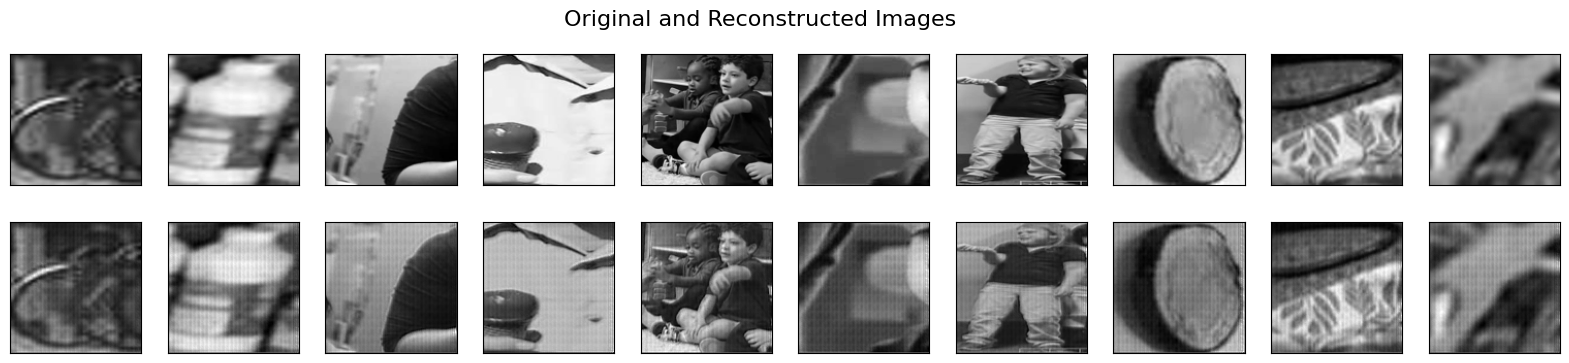

In [7]:

n = 10
plt.figure(figsize=(20, 4))
plt.suptitle('Original and Reconstructed Images', fontsize=16) 
for i in range(1, n + 1):
    # Display original
    ax = plt.subplot(2, n, i)
    plt.imshow(x_test[i].reshape(128, 128))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.imshow(decoded_imgs[i].reshape(128, 128))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [8]:
autoencoder_path = 'conv_autoencoder.keras'
autoencoder = keras.models.load_model(autoencoder_path)
encoder = autoencoder.layers[1]  # Get encoder part